#### Load Libraries

In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from scipy.stats import mode
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

### Load Data

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
#df = df.replace(['No phone service','No internet service'], 'No')
#df

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
x = df.drop(['customerID','Churn'], axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [11]:
df_ohe = pd.get_dummies(x)
df_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [12]:
services = ['PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 
            'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 
            'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes']

df_ohe['services'] = df_ohe[services].apply(lambda x: x.sum(), axis=1)
df_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,services
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,3
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,4
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,5
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,4
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,9
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,8
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,3
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,4


In [13]:
df_ohe['monthly_service_charge'] = df_ohe['MonthlyCharges']/df_ohe['services']
df_ohe['total_service_charge'] = df_ohe['TotalCharges']/df_ohe['services']
df_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,services,monthly_service_charge,total_service_charge
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,1,0,0,1,0,3,9.950000,9.950000
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,0,0,0,1,4,14.237500,472.375000
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,1,0,0,0,1,5,10.770000,21.630000
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,0,0,4,10.575000,460.187500
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,1,0,0,1,0,3,23.566667,50.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,0,1,0,0,0,1,9,9.422222,221.166667
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,0,1,0,1,0,0,8,12.900000,920.362500
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,1,0,0,1,0,3,9.866667,115.483333
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,0,1,0,0,0,1,4,18.600000,76.650000


In [14]:
df_ohe['churn'] = df['Churn']
df_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,services,monthly_service_charge,total_service_charge,churn
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,1,0,3,9.950000,9.950000,No
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,0,0,0,1,4,14.237500,472.375000,No
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,5,10.770000,21.630000,Yes
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,0,0,4,10.575000,460.187500,No
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,1,0,3,23.566667,50.550000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,1,0,0,0,1,9,9.422222,221.166667,No
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,1,0,0,8,12.900000,920.362500,No
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,1,0,3,9.866667,115.483333,No
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,4,18.600000,76.650000,Yes


In [15]:
df_ohe['churn'] = df_ohe['churn'].replace('No', 0)
df_ohe['churn'] = df_ohe['churn'].replace('Yes', 1)
df_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,services,monthly_service_charge,total_service_charge,churn
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,1,0,3,9.950000,9.950000,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,0,0,0,1,4,14.237500,472.375000,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,5,10.770000,21.630000,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,0,0,4,10.575000,460.187500,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,1,0,3,23.566667,50.550000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,1,0,0,0,1,9,9.422222,221.166667,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,1,0,0,8,12.900000,920.362500,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,1,0,3,9.866667,115.483333,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,4,18.600000,76.650000,1


In [16]:
scaler = MinMaxScaler()
scaler.fit(df_ohe)
# transform the data
scaled = scaler.fit_transform(df_ohe)
# load the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled, columns=df_ohe.columns)
# view new DataFrame
scaled_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,services,monthly_service_charge,total_service_charge,churn
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.222222,0.095974,0.005453,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.246062,0.258864,0.0
2,0.0,0.027778,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.444444,0.124679,0.011853,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.117853,0.252185,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.222222,0.572637,0.027702,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.888889,0.077499,0.121200,0.0
7039,0.0,1.000000,0.845274,0.847792,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.777778,0.199242,0.504363,0.0
7040,0.0,0.152778,0.112935,0.039892,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.222222,0.093057,0.063285,0.0
7041,1.0,0.055556,0.558706,0.035303,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.333333,0.398775,0.042005,1.0


In [17]:
X = scaled_df.iloc[:,:-1]
y = scaled_df.iloc[:,-1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=13)

In [65]:
lr_model = LogisticRegression(random_state=13, solver = "saga")
lr_model = lr_model.fit(X_train, y_train)
ylr_pred = lr_model.predict(X_test)

/Users/elizabethstepton/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [66]:
print(classification_report(y_test, ylr_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      1048
         1.0       0.64      0.57      0.60       361

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



Accuracy: 0.762
Recall: 0.792
Precision: 0.523


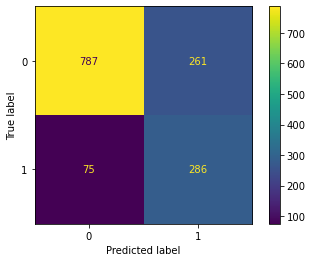

In [67]:
x_test_array = np.array(X_test).reshape(-1,48)
y_predict_prob = lr_model.predict_proba(x_test_array)
y_predict_prob_class_1 = y_predict_prob[:,1]
y_predict_class = [1 if prob > 0.3 else 0 for prob in y_predict_prob_class_1]
print("Accuracy:", round(metrics.accuracy_score(y_test, y_predict_class), 3))
print("Recall:", round(metrics.recall_score(y_test, y_predict_class), 3))
print("Precision:", round(metrics.precision_score(y_test, y_predict_class), 3))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict_class)).plot()

In [22]:
metrics.recall_score(y_test, ylr_pred)

0.5650969529085873

In [23]:
metrics.precision_score(y_test, ylr_pred)

0.6375

In [24]:
metrics.accuracy_score(y_test, ylr_pred)

0.8062455642299503

In [25]:
dt = DecisionTreeClassifier(random_state=13)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      1048
         1.0       0.48      0.49      0.48       361

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.74      0.73      0.73      1409



In [27]:
metrics.accuracy_score(y_test, y_pred)

0.7331440738112136

In [28]:
metrics.recall_score(y_test, y_pred)

0.4903047091412742

In [29]:
metrics.roc_auc_score(y_test, y_pred)

0.6535493011355226

In [30]:
dtbag = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator = dtbag,
                         n_estimators = 500,
                         random_state = 13).fit(X_train, y_train)

bag_pred = model.predict(X_test)

In [31]:
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1048
         1.0       0.59      0.51      0.55       361

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [32]:
confusion_matrix(y_test, bag_pred)

array([[922, 126],
       [176, 185]])

In [33]:
metrics.accuracy_score(y_test, bag_pred)

0.7856635911994322

In [34]:
metrics.recall_score(y_test, bag_pred)

0.5124653739612188

In [35]:
metrics.roc_auc_score(y_test, bag_pred)

0.6961181831638156

In [36]:
rf = RandomForestClassifier(random_state=13)
rf = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [37]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1048
         1.0       0.63      0.48      0.55       361

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.79      1409



In [38]:
confusion_matrix(y_test, rf_pred)

array([[945, 103],
       [186, 175]])

In [39]:
metrics.accuracy_score(y_test, rf_pred)

0.794889992902768

In [40]:
metrics.recall_score(y_test, rf_pred)

0.48476454293628807

In [41]:
metrics.roc_auc_score(y_test, rf_pred)

0.6932410500940982

In [42]:
rf_model = BaggingClassifier(base_estimator = RandomForestClassifier(),
                         n_estimators = 500,
                         random_state = 13).fit(X_train, y_train)


In [43]:
rfbag_pred = rf_model.predict(X_test)

In [44]:
print(classification_report(y_test, rfbag_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1048
         1.0       0.64      0.50      0.57       361

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [45]:
confusion_matrix(y_test, rfbag_pred)

array([[947, 101],
       [179, 182]])

In [46]:
metrics.accuracy_score(y_test, rfbag_pred)

0.801277501774308

In [47]:
metrics.recall_score(y_test, rfbag_pred)

0.5041551246537396

In [48]:
metrics.roc_auc_score(y_test, rfbag_pred)

0.7038905394261065

In [49]:
lr = LogisticRegression(random_state=13, solver = "newton-cg")
lr = lr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [50]:
metrics.accuracy_score(y_test, lr_pred)

0.8062455642299503

In [51]:
metrics.recall_score(y_test, lr_pred)

0.5650969529085873

In [52]:
metrics.roc_auc_score(y_test, lr_pred)

0.7272049650039119

In [53]:
lrboot = LogisticRegression(solver='lbfgs', max_iter=1000)

n_bootstrap = 100

bootstrap_preds = []

for i in range(n_bootstrap):
    X_boot, y_boot = resample(X_train, y_train)
    lrboot.fit(X_boot, y_boot)
    y_pred = lrboot.predict(X_test)
    bootstrap_preds.append(y_pred)

majority_voting = mode(bootstrap_preds, axis=0)[0][0]

accuracy = metrics.accuracy_score(y_test, majority_voting)

print('Accuracy with majority voting:', accuracy)

Accuracy with majority voting: 0.8055358410220014


Accuracy: 0.768
Recall: 0.781
Precision: 0.532


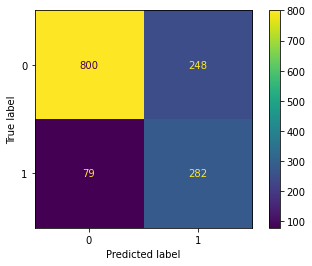

In [54]:
x_test_array = np.array(X_test).reshape(-1,48)
y_predict_prob = lrboot.predict_proba(x_test_array)
y_predict_prob_class_1 = y_predict_prob[:,1]
y_predict_class = [1 if prob > 0.31 else 0 for prob in y_predict_prob_class_1]
print("Accuracy:", round(metrics.accuracy_score(y_test, y_predict_class), 3))
print("Recall:", round(metrics.recall_score(y_test, y_predict_class), 3))
print("Precision:", round(metrics.precision_score(y_test, y_predict_class), 3))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict_class)).plot()

In [55]:
recall = []
acc = []

x_test_array = np.array(X_test).reshape(-1,48)
y_predict_prob = lrboot.predict_proba(x_test_array)
y_predict_prob_class_1 = y_predict_prob[:,1]

for i in np.arange(0.0, 1.0, 0.01):
    y_predict_class = [1 if prob > i else 0 for prob in y_predict_prob_class_1]
    recall.append(round(metrics.recall_score(y_test, y_predict_class),3))
    acc.append(round(metrics.accuracy_score(y_test, y_predict_class),3))

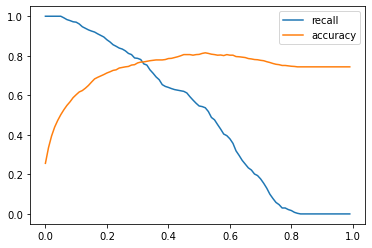

In [56]:
plt.plot(np.arange(0.0, 1.0, 0.01), recall, label='recall')
plt.plot(np.arange(0.0, 1.0, 0.01), acc, label='accuracy')
plt.legend()

In [57]:
np.argwhere(np.diff(np.sign(np.array(acc) - np.array(recall)))).flatten()

array([31])

In [58]:
log_reg = LogisticRegression(solver='liblinear')

scores = cross_val_score(log_reg, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy scores for each fold:", scores)
print("Mean accuracy score:", scores.mean())

log_reg.fit(X_train, y_train)

test_score = log_reg.score(X_test, y_test)
print("Test accuracy score:", test_score)

Accuracy scores for each fold: [0.77836879 0.79964539 0.80319149 0.79609929 0.82238011 0.81705151
 0.81172291 0.79040853 0.78507993 0.81349911]
Mean accuracy score: 0.801744706045375
Test accuracy score: 0.8062455642299503


In [59]:
scaled_df['churn'].value_counts()/len(scaled_df)

0.0    0.73463
1.0    0.26537
Name: churn, dtype: float64

In [60]:
y_train.value_counts()/len(y_train)

0.0    0.732339
1.0    0.267661
Name: churn, dtype: float64

<AxesSubplot:>

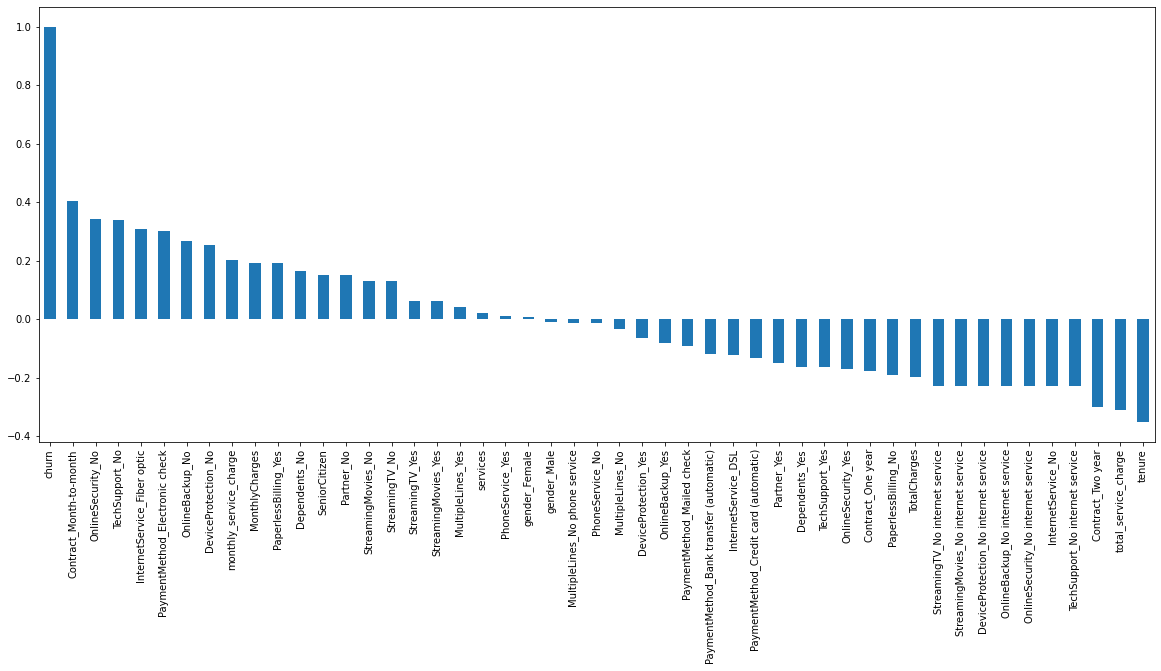

In [63]:
plt.figure(figsize=(20,8))
df_ohe.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

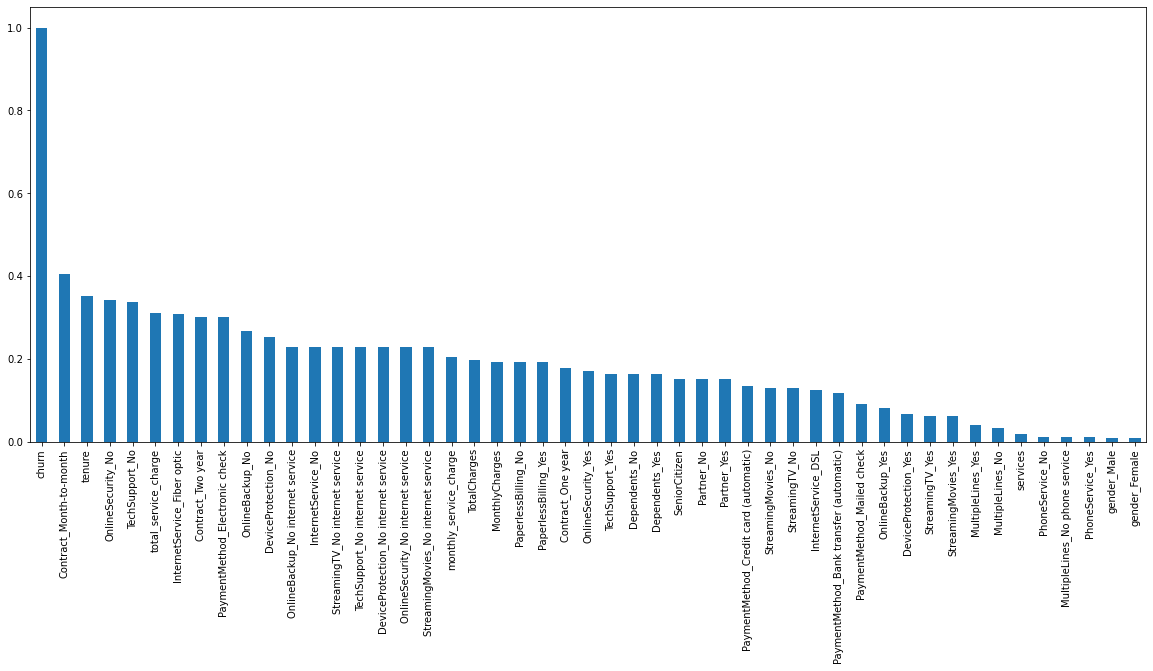

In [64]:
plt.figure(figsize=(20,8))
abs(df_ohe.corr()['churn']).sort_values(ascending = False).plot(kind='bar')

In [83]:
ln = RidgeClassifier(random_state=13)
ln.fit(X_train, y_train)
ln_pred = ln.predict(X_test)

metrics.accuracy_score(y_test, ln_pred)

0.8140525195173882

In [84]:
metrics.recall_score(y_test, ln_pred)

0.554016620498615

In [75]:
lnboot = RidgeClassifier()

n_bootstrap = 100

bootstrap_preds = []

for i in range(n_bootstrap):
    X_boot, y_boot = resample(X_train, y_train)
    lnboot.fit(X_boot, y_boot)
    y_pred = lnboot.predict(X_test)
    bootstrap_preds.append(y_pred)

majority_voting = mode(bootstrap_preds, axis=0)[0][0]

accuracy = metrics.accuracy_score(y_test, majority_voting)

print('Accuracy with majority voting:', accuracy)

Accuracy with majority voting: 0.8133427963094393


In [76]:
ln_cv = RidgeClassifier()

scores = cross_val_score(ln_cv, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy scores for each fold:", scores)
print("Mean accuracy score:", scores.mean())

ln_cv.fit(X_train, y_train)

test_score = ln_cv.score(X_test, y_test)
print("Test accuracy score:", test_score)

Accuracy scores for each fold: [0.76595745 0.80673759 0.80673759 0.79255319 0.82060391 0.82060391
 0.80106572 0.78507993 0.76909414 0.80994671]
Mean accuracy score: 0.7978380131766247
Test accuracy score: 0.8140525195173882


In [87]:
sgd = SGDClassifier(random_state=13)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

metrics.accuracy_score(y_test, sgd_pred)

0.8076650106458482

In [80]:
metrics.recall_score(y_test, sgd_pred)

0.5346260387811634

In [81]:
sgdboot = SGDClassifier()

n_bootstrap = 100

bootstrap_preds = []

for i in range(n_bootstrap):
    X_boot, y_boot = resample(X_train, y_train)
    sgdboot.fit(X_boot, y_boot)
    y_pred = sgdboot.predict(X_test)
    bootstrap_preds.append(y_pred)

majority_voting = mode(bootstrap_preds, axis=0)[0][0]

accuracy = metrics.accuracy_score(y_test, majority_voting)

print('Accuracy with majority voting:', accuracy)

Accuracy with majority voting: 0.8090844570617459


In [86]:
sgd_cv = SGDClassifier()

scores = cross_val_score(sgd_cv, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy scores for each fold:", scores)
print("Mean accuracy score:", scores.mean())

sgd_cv.fit(X_train, y_train)

test_score = ln_cv.score(X_test, y_test)
print("Test accuracy score:", test_score)

Accuracy scores for each fold: [0.75       0.81737589 0.79964539 0.79964539 0.80639432 0.79573712
 0.80106572 0.77442274 0.77619893 0.80639432]
Mean accuracy score: 0.7926879810538779
Test accuracy score: 0.8140525195173882


In [108]:
reordered_train = X_train[list(abs(df_ohe.corr()['churn']).sort_values(ascending = False).index)[1:]]
reordered_test = X_test[list(abs(df_ohe.corr()['churn']).sort_values(ascending = False).index)[1:]]

range_of_num_features = range(1, reordered_train.shape[1] + 1)

accuracy = []
for N in range_of_num_features:
    print(f"Trying first {N} features")
    ln_feat = LogisticRegression(max_iter=1000)
    
    # compute the cross validation error
    accu = cross_val_score(ln_feat, reordered_train.iloc[:,0:N], y_train, cv=10, scoring='accuracy').mean()
    
    print("\tAccurary:", accu)
    accuracy.append(accu)

best_num_features = np.argmin(accuracy) + 1
best_err = max(accuracy)

print(f"Best choice, use the first {best_num_features} features")

Trying first 1 features
	Accurary: 0.73233941775947
Trying first 2 features
	Accurary: 0.7552319136339015
Trying first 3 features
	Accurary: 0.7754717634758073
Trying first 4 features
	Accurary: 0.7744041545419045
Trying first 5 features
	Accurary: 0.7752916241512666
Trying first 6 features
	Accurary: 0.788605242936145
Trying first 7 features
	Accurary: 0.7886052429361451
Trying first 8 features
	Accurary: 0.7976607082120857
Trying first 9 features
	Accurary: 0.7960605545267878
Trying first 10 features
	Accurary: 0.7958829346333598
Trying first 11 features
	Accurary: 0.7969483390650391
Trying first 12 features
	Accurary: 0.7969483390650391
Trying first 13 features
	Accurary: 0.7969483390650391
Trying first 14 features
	Accurary: 0.7969483390650391
Trying first 15 features
	Accurary: 0.7969483390650391
Trying first 16 features
	Accurary: 0.7969483390650391
Trying first 17 features
	Accurary: 0.7969483390650391
Trying first 18 features
	Accurary: 0.7987235932126526
Trying first 19 featur

In [113]:
accuracy = []
for N in range_of_num_features:
    print(f"Trying first {N} features")
    ln_feat = LogisticRegression(max_iter=1000)
    
    # compute the cross validation error
    ln_feat.fit(reordered_train.iloc[:,0:N], y_train)
    preds = ln_feat.predict(reordered_test.iloc[:,0:N])
    accu = metrics.accuracy_score(y_test, preds)
    
    print("\tAccurary:", accu)
    accuracy.append(accu)

best_num_features = np.argmax(accuracy) + 1
best_acc = max(accuracy)

print(f"Best choice, use the first {best_num_features} features")

Trying first 1 features
	Accurary: 0.7437899219304471
Trying first 2 features
	Accurary: 0.7679205110007097
Trying first 3 features
	Accurary: 0.7771469127040455
Trying first 4 features
	Accurary: 0.7963094393186657
Trying first 5 features
	Accurary: 0.7977288857345636
Trying first 6 features
	Accurary: 0.8034066713981547
Trying first 7 features
	Accurary: 0.8034066713981547
Trying first 8 features
	Accurary: 0.8133427963094393
Trying first 9 features
	Accurary: 0.8140525195173882
Trying first 10 features
	Accurary: 0.8147622427253371
Trying first 11 features
	Accurary: 0.8126330731014905
Trying first 12 features
	Accurary: 0.8126330731014905
Trying first 13 features
	Accurary: 0.8126330731014905
Trying first 14 features
	Accurary: 0.8126330731014905
Trying first 15 features
	Accurary: 0.8126330731014905
Trying first 16 features
	Accurary: 0.8126330731014905
Trying first 17 features
	Accurary: 0.8126330731014905
Trying first 18 features
	Accurary: 0.808374733853797
Trying first 19 feat

### Exploratory Data Analysis

You can leverage what done in one of the previous assignments, recreate it and expand it.

### Feature Engineering and Analysis
Think about any possible feature that is predictive of the target.  
Measure how each feature is predictive of the target and select all those relevant for the model.

### Configure the model using an appropriate classification technique

### Chose the correct metric for assessment of the model